<a href="https://colab.research.google.com/github/rajibmondal/Projects.NLP/blob/master/Twitter_US_Airline_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import fastai
fastai.__version__

'1.0.60'

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *
bs=42

In [3]:
from google.colab import drive
drive.mount('/content/drive')
root_dir = '/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/'
base_dir = root_dir# + 'weights/Airlines_NLP'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
base_dir = Path(base_dir)

In [5]:
# check if the dirctory exists if not make it
import os
if not (os.path.exists(base_dir)):
  base_dir.mkdir(parents=True, exist_ok=True)
base_dir

PosixPath('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment')

In [6]:
path = Path('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/')
path.ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/Tweets.csv'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/Twitter US Airline Sentiment.ipynb'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/models'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/fit_head.pkl'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/fit_head1.pkl')]

In [7]:
df = pd.read_csv(path/'Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
data_clas = (TextList
           .from_csv(path, 'Tweets.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_from_df(cols='airline_sentiment')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch

In [9]:
data_clas.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup dub - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup dub 13 / 10 . i 'm * xxup xxunk xxmaj what is checked bag allowance for xxup jac - xxup lax ?,neutral
xxbos @southwestair xxmaj the xxmaj fact xxmaj that u xxmaj see xxmaj black xxmaj history xxmaj month 12 xxmaj months a xxmaj year xxmaj is xxmaj xxunk ! xxmaj we xxup will xxup be xxmaj an xxmaj xxunk xxmaj base xxmaj for xxmaj xxunk xxmaj like u xxmaj in xxmaj future !,positive
"xxbos @united xxmaj hi , i m flying xxup sfo - xxup lax - xxup xxunk - xxup xxunk . xxmaj my connecting time in xxup lax is xxunk m . xxmaj is it enough time ? xxmaj do i have to collect my bag and xxunk on xxup xxunk ?",neutral
xxbos @americanair xxmaj hi . i have xxup koa - xxup lax - xxup phl - xxup ord booked as a 1-way xxunk xxunk . xxmaj if i called to xxunk it to xxup koa - xxup lax - xxup phx - xxup ord would i have to pay any fees,neutral
"xxbos @united xxmaj united xxmaj club team is xxup a+ & & got me a seat xxmaj late xxmaj flightr . xxmaj still , not sure why a last min xxup ual xxmaj cancelled xxmaj flightlation costs me $ yet overbooked folks get $ ?",negative


In [11]:
data_clas.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.']

In [10]:
[(v, i) for i, v in enumerate(data_clas.vocab.stoi)][:100]

[('xxunk', 0),
 ('xxpad', 1),
 ('xxbos', 2),
 ('xxeos', 3),
 ('xxfld', 4),
 ('xxmaj', 5),
 ('xxup', 6),
 ('xxrep', 7),
 ('xxwrep', 8),
 ('.', 9),
 ('to', 10),
 ('i', 11),
 ('the', 12),
 ('!', 13),
 ('a', 14),
 ('?', 15),
 ('/', 16),
 ('you', 17),
 (',', 18),
 ('for', 19),
 ('flight', 20),
 ('@united', 21),
 ('on', 22),
 ('and', 23),
 ('#', 24),
 ('my', 25),
 ('@usairways', 26),
 ('is', 27),
 ('@americanair', 28),
 ('in', 29),
 ('it', 30),
 ('@southwestair', 31),
 ('@jetblue', 32),
 ('of', 33),
 ("n't", 34),
 ('me', 35),
 ('your', 36),
 (':', 37),
 ('that', 38),
 ('have', 39),
 ('was', 40),
 ('not', 41),
 ("'s", 42),
 ('-', 43),
 ('with', 44),
 ('at', 45),
 ('no', 46),
 ('this', 47),
 ('do', 48),
 ('get', 49),
 ('we', 50),
 ('&', 51),
 ('but', 52),
 ('be', 53),
 ('t.co', 54),
 ('from', 55),
 ('can', 56),
 ('http', 57),
 ('are', 58),
 ('thanks', 59),
 ('cancelled', 60),
 ('now', 61),
 ('an', 62),
 ('just', 63),
 ('service', 64),
 ('"', 65),
 ('so', 66),
 ('help', 67),
 ('...', 68),
 ('be

In [12]:
data_clas.train_ds[100]

(Text xxbos @virginamerica has getaway deals through xxmaj may , from $ 59 one - way . xxmaj lots of cool cities http : / / t.co / xxunk # cheapflights # farecompare,
 Category neutral)

In [13]:
data_clas.train_ds[100][0].data[:100]

array([   2,  102,  104, 2636, 1187,  217,    5,  529,   18,   55,  124, 2014,   96,   43,  139,    9,    5,  838,
         33,  527, 1339,   57,   37,   16,   16,   54,   16,    0,   24, 3007,   24, 3008])

In [14]:
%time
data_lm = (TextList
           .from_csv(path, 'Tweets.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct(0.1)
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()#from_df(cols='target')
           #Label it for a language model
           .databunch(bs=bs))
           #Finally we convert to a DataBunch

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


In [15]:
data_lm.show_batch()

idx,text
0,"seats that did n't have this playing . \n it 's really the only bad thing about flying xxup va xxbos @virginamerica yes , nearly every time i fly xxup vx this “ xxunk xxunk ” wo n’t go away :) xxbos @virginamerica xxmaj really missed a prime opportunity for xxmaj men xxmaj without xxmaj hats xxunk , there . https : / / t.co / xxunk xxbos @virginamerica"
1,"flight xxmaj booking xxmaj problems last second flight for next week from xxup xxunk to xxup san any chance you want to gift me a promo code since i love you guys xxbos @virginamerica xxmaj xxunk xxmaj bank is a joke ! xxmaj please change . xxmaj nothing but constant problems with this bank xxbos @virginamerica i just did , how can i xxup dm ? xxmaj do u have"
2,are not ... lady one phone says its in tel aviv . xxmaj tel xxmaj aviv united says its in xxmaj newark . xxmaj no one knows and i have nothing ... xxbos “ @united : xxunk xxmaj we 'll see what we can do . xxup ^kn ” xxmaj we are running ! xxmaj most of this plane is running . xxmaj thanks for the help ! xxbos @united
3,went above & & beyond to get my stranded family home . xxbos @united do n't see a xxunk cost to get on an early flight with seats . xxmaj no airline charges to xxunk get their passengers in early xxbos @united xxmaj woke up to xxunk flight moved 1.5 hrs early . xxmaj barely made flight then 3 hrs layover in xxup sfo - wanted to hop on earlier
4,"to arrive with only 8 hours of delay and exhausted xxbos @united xxmaj if you consider 50 mins for bags @ xxunk on a xxmaj sunday night "" as fast as they can "" , you should reconsider what you think that means . xxbos @united xxmaj it 's the horrible attitude from staff after , not just the delay . xxmaj not the level of service or respect one"


In [16]:
# drop_mult speifies the amount of dropout to apply
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


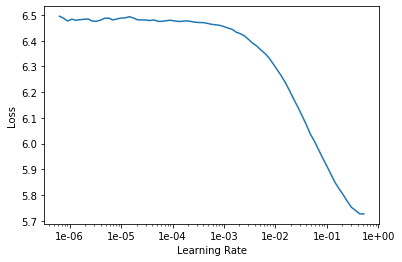

In [17]:
learn.lr_find()
# skip the last 15 learning rates in the plot so we can get a better visualization
learn.recorder.plot(skip_end=15)

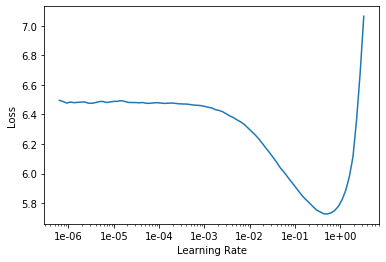

In [18]:
learn.recorder.plot()


In [19]:
learn.fit_one_cycle(1, 1e-01, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.320322,3.935483,0.261460,00:11


In [20]:
%%time
learn.export(base_dir/'fit_head1.pkl')

CPU times: user 83 ms, sys: 42.1 ms, total: 125 ms
Wall time: 4.79 s


In [21]:
learn = load_learner(base_dir, 'fit_head1.pkl')

In [0]:
learn.data = data_lm

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-05
Min loss divided by 10: 4.37E-04


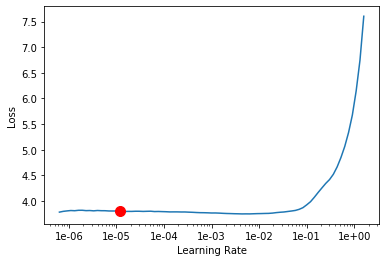

In [24]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
from fastai.callbacks import *
import os
os.chdir(base_dir)

In [0]:
callbacks = [SaveModelCallback(learn, every='epoch', monitor='valid_loss', mode='auto', name='fine_tuned')]

In [27]:
learn.fit_one_cycle(2, 1e-02, moms=(0.8, 0.7), callbacks=callbacks)

epoch,train_loss,valid_loss,accuracy,time
0,3.785917,3.746484,0.281685,00:11
1,3.332145,3.633826,0.298744,00:12


In [28]:
(base_dir/'models').ls()

[PosixPath('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/models/tmp.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/models/fine_tuned_0.pth'),
 PosixPath('/content/drive/My Drive/NLP/NLP_DATA/Twitter US Airline Sentiment/models/fine_tuned_1.pth')]

In [0]:
learn.load('fine_tuned_1');

In [0]:
learn.save_encoder('fine_tuned_enc')

In [33]:
data_lm.train_ds.vocab

In [34]:
len(data_lm.vocab.itos)

4416

In [35]:
data_cls = (TextList.from_csv(path, csv_name='Tweets.csv', cols='text',vocab=data_lm.vocab)
           .split_by_rand_pct(valid_pct=0.2, seed=42)
           .label_from_df(cols='airline_sentiment')
           #.add_test(TextList.from_csv(path, csv_name='test.csv', cols='text'))
           .databunch(bs=bs))

In [36]:
data_cls.show_batch()

text,target
xxbos @united xxup where xxup is xxup my xxup fucking xxup bag ? ! ? ! xxmaj where the fuck is my fucking bag ? ? ? xxup tell xxup me xxup now xxup or xxup give xxup me a xxup number xxup to xxup call a xxup human . xxup xxunk m,negative
xxbos @americanair xxmaj aww xxmaj thanks xxup aa .. xxup dfw was on xxup xxunk up here this xxup am .. so i understand .. xxmaj btw xxup xxunk is my xxmaj airline when i m able to xxunk .. xxmaj love you guys . : ),positive
"xxbos @united xxup xxunk from xxup ric , xxup xxunk from xxup ord , & & xxup xxunk from xxup den xxup xxunk xxup delayed for non - weather issues . xxmaj way to go , you re batting xxunk ! xxmaj but no hotels",negative
xxbos @usairways xxmaj my xxmaj flight xxmaj booking xxmaj problems xxup xxunk just times out when i select it under xxmaj manage xxmaj my xxmaj flight xxmaj booking xxmaj problems for months now . i have emailed but no response . xxmaj help ?,negative
xxbos @usairways - flight was xxmaj cancelled xxmaj flightled to xxmaj buf today . xxmaj waited in line for 2 + hrs & & xxunk service was rude . xxmaj no flight until xxmaj tues . xxmaj need to get to xxup roc .,negative


In [0]:
data_cls.save(base_dir/'data_cls.pkl')

In [0]:
data_cls = load_data(base_dir, 'data_cls.pkl', bs=bs)

In [0]:
learn = text_classifier_learner(data_cls, AWD_LSTM, drop_mult=0.2)

In [0]:
learn.load_encoder('fine_tuned_enc');

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-02
Min loss divided by 10: 2.51E-02


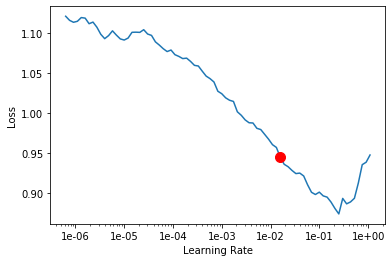

In [43]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [44]:
learn.fit_one_cycle(1, 1e-02, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.612502,0.502403,0.799863,00:12


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [49]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.586639,0.479213,0.811475,00:11


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [53]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.465005,0.445382,0.826844,00:13


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [57]:
learn.unfreeze
learn.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.362949,0.459048,0.819672,00:12
1,0.320381,0.473362,0.822063,00:13
2,0.266854,0.504950,0.823429,00:13
3,0.202483,0.516472,0.816257,00:12
